# CAPSTONE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [4]:
Train_data=pd.read_csv("/content/drive/MyDrive//NSL-KDD/KDDTrain+.txt")

In [5]:
Test_data=pd.read_csv("/content/drive/MyDrive//NSL-KDD/KDDTest+.txt")

In [ ]:
Train_data.head()

0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  ...  0.17  0.03  \
0  0  udp    other   SF  146     0    0    0    0    0  ...  0.00  0.60   
1  0  tcp  private   S0    0     0    0    0    0    0  ...  0.10  0.05   
2  0  tcp     http   SF  232  8153    0    0    0    0  ...  1.00  0.00   
3  0  tcp     http   SF  199   420    0    0    0    0  ...  1.00  0.00   
4  0  tcp  private  REJ    0     0    0    0    0    0  ...  0.07  0.07   

   0.17.1  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0    0.88    0.00    0.00    0.00   0.0    0.00   normal  15  
1    0.00    0.00    1.00    1.00   0.0    0.00  neptune  19  
2    0.03    0.04    0.03    0.01   0.0    0.01   normal  21  
3    0.00    0.00    0.00    0.00   0.0    0.00   normal  21  
4    0.00    0.00    0.00    0.00   1.0    1.00  neptune  21  

[5 rows x 43 columns]

In [6]:
Train_data.drop('20',axis=1,inplace=True)

In [7]:
Test_data.drop('21',axis=1,inplace=True)

In [ ]:
Train_data

0  tcp  ftp_data   SF   491   0.1  0.2  0.3  0.4  0.5  ...   25  0.17  \
0       0  udp     other   SF   146     0    0    0    0    0  ...    1  0.00   
1       0  tcp   private   S0     0     0    0    0    0    0  ...   26  0.10   
2       0  tcp      http   SF   232  8153    0    0    0    0  ...  255  1.00   
3       0  tcp      http   SF   199   420    0    0    0    0  ...  255  1.00   
4       0  tcp   private  REJ     0     0    0    0    0    0  ...   19  0.07   
...    ..  ...       ...  ...   ...   ...  ...  ...  ...  ...  ...  ...   ...   
125967  0  tcp   private   S0     0     0    0    0    0    0  ...   25  0.10   
125968  8  udp   private   SF   105   145    0    0    0    0  ...  244  0.96   
125969  0  tcp      smtp   SF  2231   384    0    0    0    0  ...   30  0.12   
125970  0  tcp    klogin   S0     0     0    0    0    0    0  ...    8  0.03   
125971  0  tcp  ftp_data   SF   151     0    0    0    0    0  ...   77  0.30   

        0.03  0.17.1  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  
0       0.60    0.88    0.00    0.00    0.00  0.00    0.00   normal  
1       0.05    0.00    0.00    1.00    1.00  0.00    0.00  neptune  
2       0.00    0.03    0.04    0.03    0.01  0.00    0.01   normal  
3       0.00    0.00    0.00    0.00    0.00  0.00    0.00   normal  
4       0.07    0.00    0.00    0.00    0.00  1.00    1.00  neptune  
...      ...     ...     ...     ...     ...   ...     ...      ...  
125967  0.06    0.00    0.00    1.00    1.00  0.00    0.00  neptune  
125968  0.01    0.01    0.00    0.00    0.00  0.00    0.00   normal  
125969  0.06    0.00    0.00    0.72    0.00  0.01    0.00   normal  
125970  0.05    0.00    0.00    1.00    1.00  0.00    0.00  neptune  
125971  0.03    0.30    0.00    0.00    0.00  0.00    0.00   normal  

[125972 rows x 42 columns]

In [ ]:
Test_data

0   tcp   private   REJ    0.1    0.2  0.3  0.4  0.5  0.6  ...  10.1  \
0      0   tcp   private   REJ      0      0    0    0    0    0  ...     1   
1      2   tcp  ftp_data    SF  12983      0    0    0    0    0  ...    86   
2      0  icmp     eco_i    SF     20      0    0    0    0    0  ...    57   
3      1   tcp    telnet  RSTO      0     15    0    0    0    0  ...    86   
4      0   tcp      http    SF    267  14515    0    0    0    0  ...   255   
...   ..   ...       ...   ...    ...    ...  ...  ...  ...  ...  ...   ...   
22538  0   tcp      smtp    SF    794    333    0    0    0    0  ...   141   
22539  0   tcp      http    SF    317    938    0    0    0    0  ...   255   
22540  0   tcp      http    SF  54540   8314    0    0    0    2  ...   255   
22541  0   udp  domain_u    SF     42     42    0    0    0    0  ...   252   
22542  0   tcp    sunrpc   REJ      0      0    0    0    0    0  ...    21   

       0.04.1  0.06.1  0.00.3  0.00.4  0.00.5  0.00.6  1.00.2  1.00.3  neptune  
0        0.00    0.06    0.00    0.00    0.00     0.0    1.00    1.00  neptune  
1        0.61    0.04    0.61    0.02    0.00     0.0    0.00    0.00   normal  
2        1.00    0.00    1.00    0.28    0.00     0.0    0.00    0.00    saint  
3        0.31    0.17    0.03    0.02    0.00     0.0    0.83    0.71    mscan  
4        1.00    0.00    0.01    0.03    0.01     0.0    0.00    0.00   normal  
...       ...     ...     ...     ...     ...     ...     ...     ...      ...  
22538    0.72    0.06    0.01    0.01    0.01     0.0    0.00    0.00   normal  
22539    1.00    0.00    0.01    0.01    0.01     0.0    0.00    0.00   normal  
22540    1.00    0.00    0.00    0.00    0.00     0.0    0.07    0.07     back  
22541    0.99    0.01    0.00    0.00    0.00     0.0    0.00    0.00   normal  
22542    0.08    0.03    0.00    0.00    0.00     0.0    0.44    1.00    mscan  

[22543 rows x 42 columns]

In [8]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent'
            ,'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root'
            ,'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login'
            ,'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate'
            ,'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
            ,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate'
            ,'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate'
            ,'dst_host_srv_rerror_rate','attack'])

In [9]:
Train_data.columns = columns

In [10]:
Test_data.columns = columns

In [ ]:
Train_data.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   1   
1               0       0    0  ...                  26   
2               0       0    0  ...                 255   
3               0       0    0  ...                 255   
4               0       0    0  ...                  19   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.00                    0.60   
1                    0.10                    0.05   
2                    1.00                    0.00   
3                    1.00                    0.00   
4                    0.07                    0.07   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.88                         0.00   
1                         0.00                         0.00   
2                         0.03                         0.04   
3                         0.00                         0.00   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                   0.0   
1                  1.00                      1.00                   0.0   
2                  0.03                      0.01                   0.0   
3                  0.00                      0.00                   0.0   
4                  0.00                      0.00                   1.0   

   dst_host_srv_rerror_rate   attack  
0                      0.00   normal  
1                      0.00  neptune  
2                      0.01   normal  
3                      0.00   normal  
4                      1.00  neptune  

[5 rows x 42 columns]

In [ ]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
Train_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
Train_data.describe()

duration     src_bytes     dst_bytes           land  \
count  125972.000000  1.259720e+05  1.259720e+05  125972.000000   
mean      287.146929  4.556710e+04  1.977927e+04       0.000198   
std      2604.525522  5.870354e+06  4.021285e+06       0.014086   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.760000e+02  5.160000e+02       0.000000   
max     42908.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125972.000000  125972.000000  125972.000000      125972.000000   
mean         0.022688       0.000111       0.204411           0.001222   
std          0.253531       0.014366       2.149977           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_count  \
count  125972.000000    125972.000000  ...   125972.000000   
mean        0.395739         0.279253  ...      182.149200   
std         0.489011        23.942137  ...       99.206565   
min         0.000000         0.000000  ...        0.000000   
25%         0.000000         0.000000  ...       82.000000   
50%         0.000000         0.000000  ...      255.000000   
75%         1.000000         0.000000  ...      255.000000   
max         1.000000      7479.000000  ...      255.000000   

       dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count       125972.000000           125972.000000           125972.000000   
mean           115.653725                0.521244                0.082952   
std            110.702886                0.448950                0.188922   
min              0.000000                0.000000                0.000000   
25%             10.000000                0.050000                0.000000   
50%             63.000000                0.510000                0.020000   
75%            255.000000                1.000000                0.070000   
max            255.000000                1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125972.000000                125972.000000   
mean                      0.148379                     0.032543   
std                       0.308998                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125972.000000             125972.000000         125972.000000   
mean               0.284455                  0.278487              0.118832   
std                0.444785                  0.445670              0.306559   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count             125972.000000  
mean                   0.120241  
std                    0.319460  
min                    0.000000  
25

<ipython-input-18-bcd1945d6c5b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Train_data.corr(), annot= True)


<Axes: >

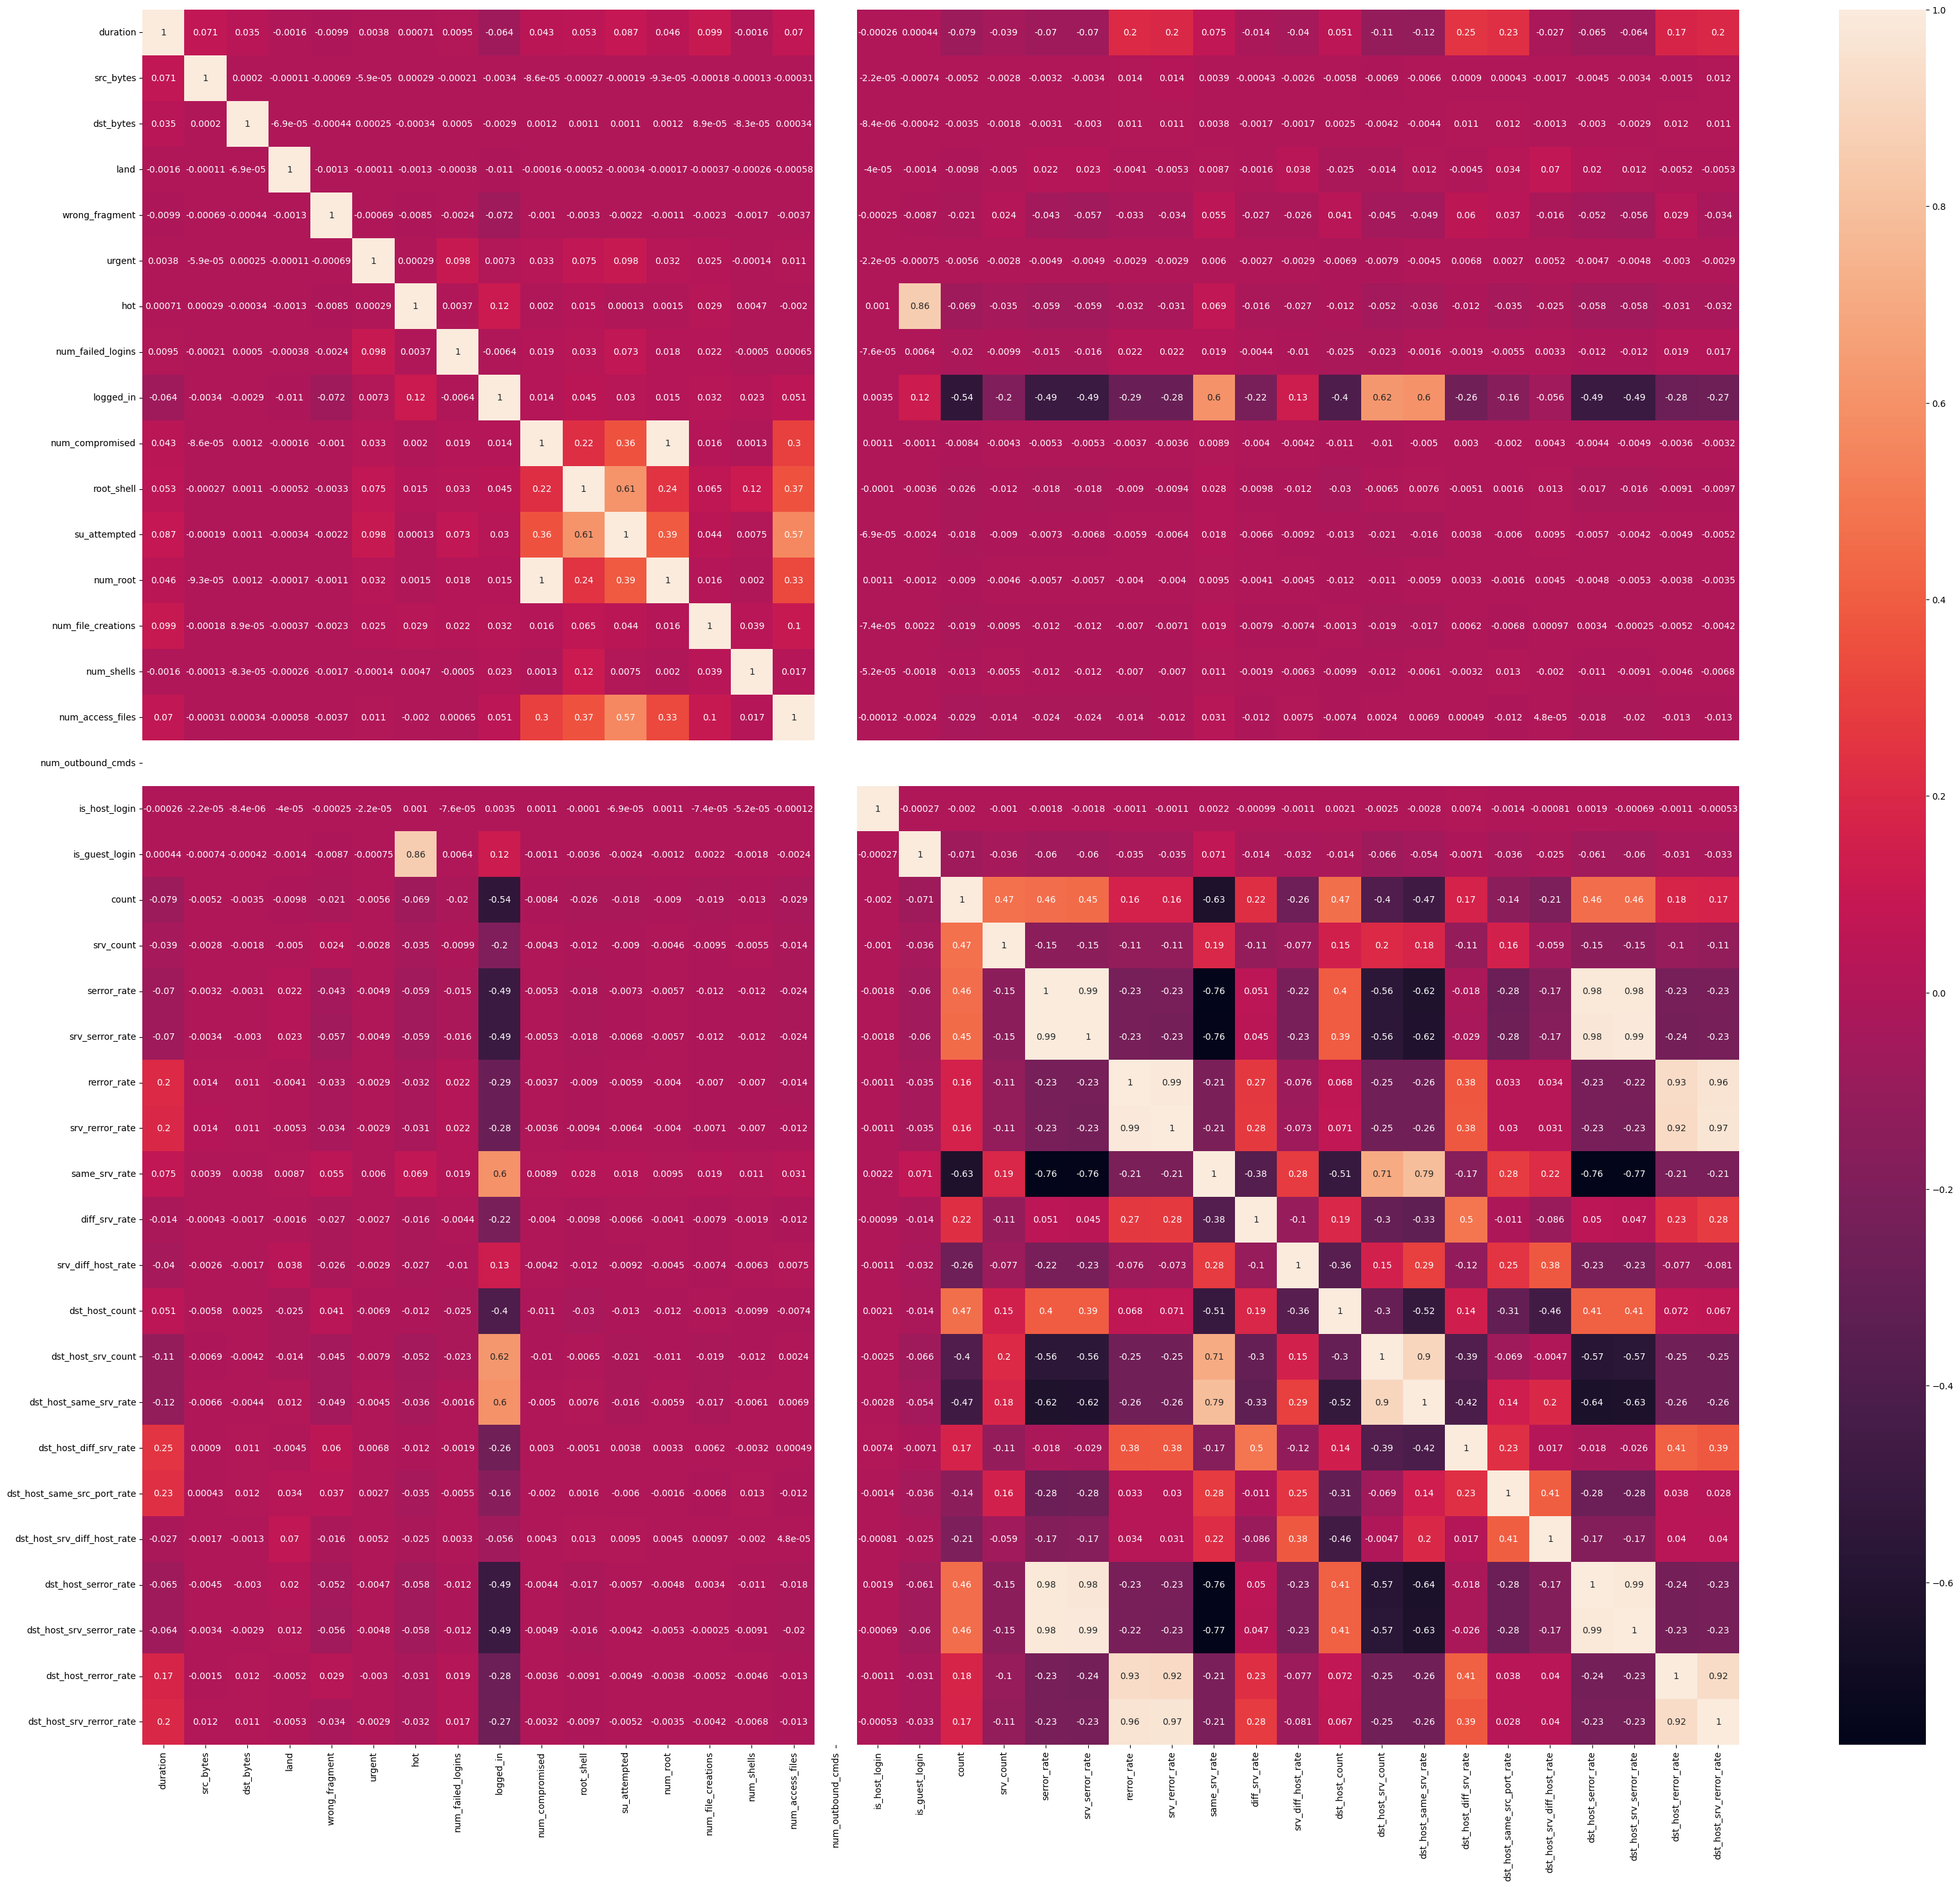

In [ ]:
plt.figure(figsize=(40,35))
sns.heatmap(Train_data.corr(), annot= True)

In [11]:
Train_data['num_outbound_cmds'].describe()

count    125972.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: num_outbound_cmds, dtype: float64

In [12]:
Train_data.drop('num_outbound_cmds',axis=1,inplace=True)

In [13]:
Test_data.drop('num_outbound_cmds',axis=1,inplace=True)

<ipython-input-21-bcd1945d6c5b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Train_data.corr(), annot= True)


<Axes: >

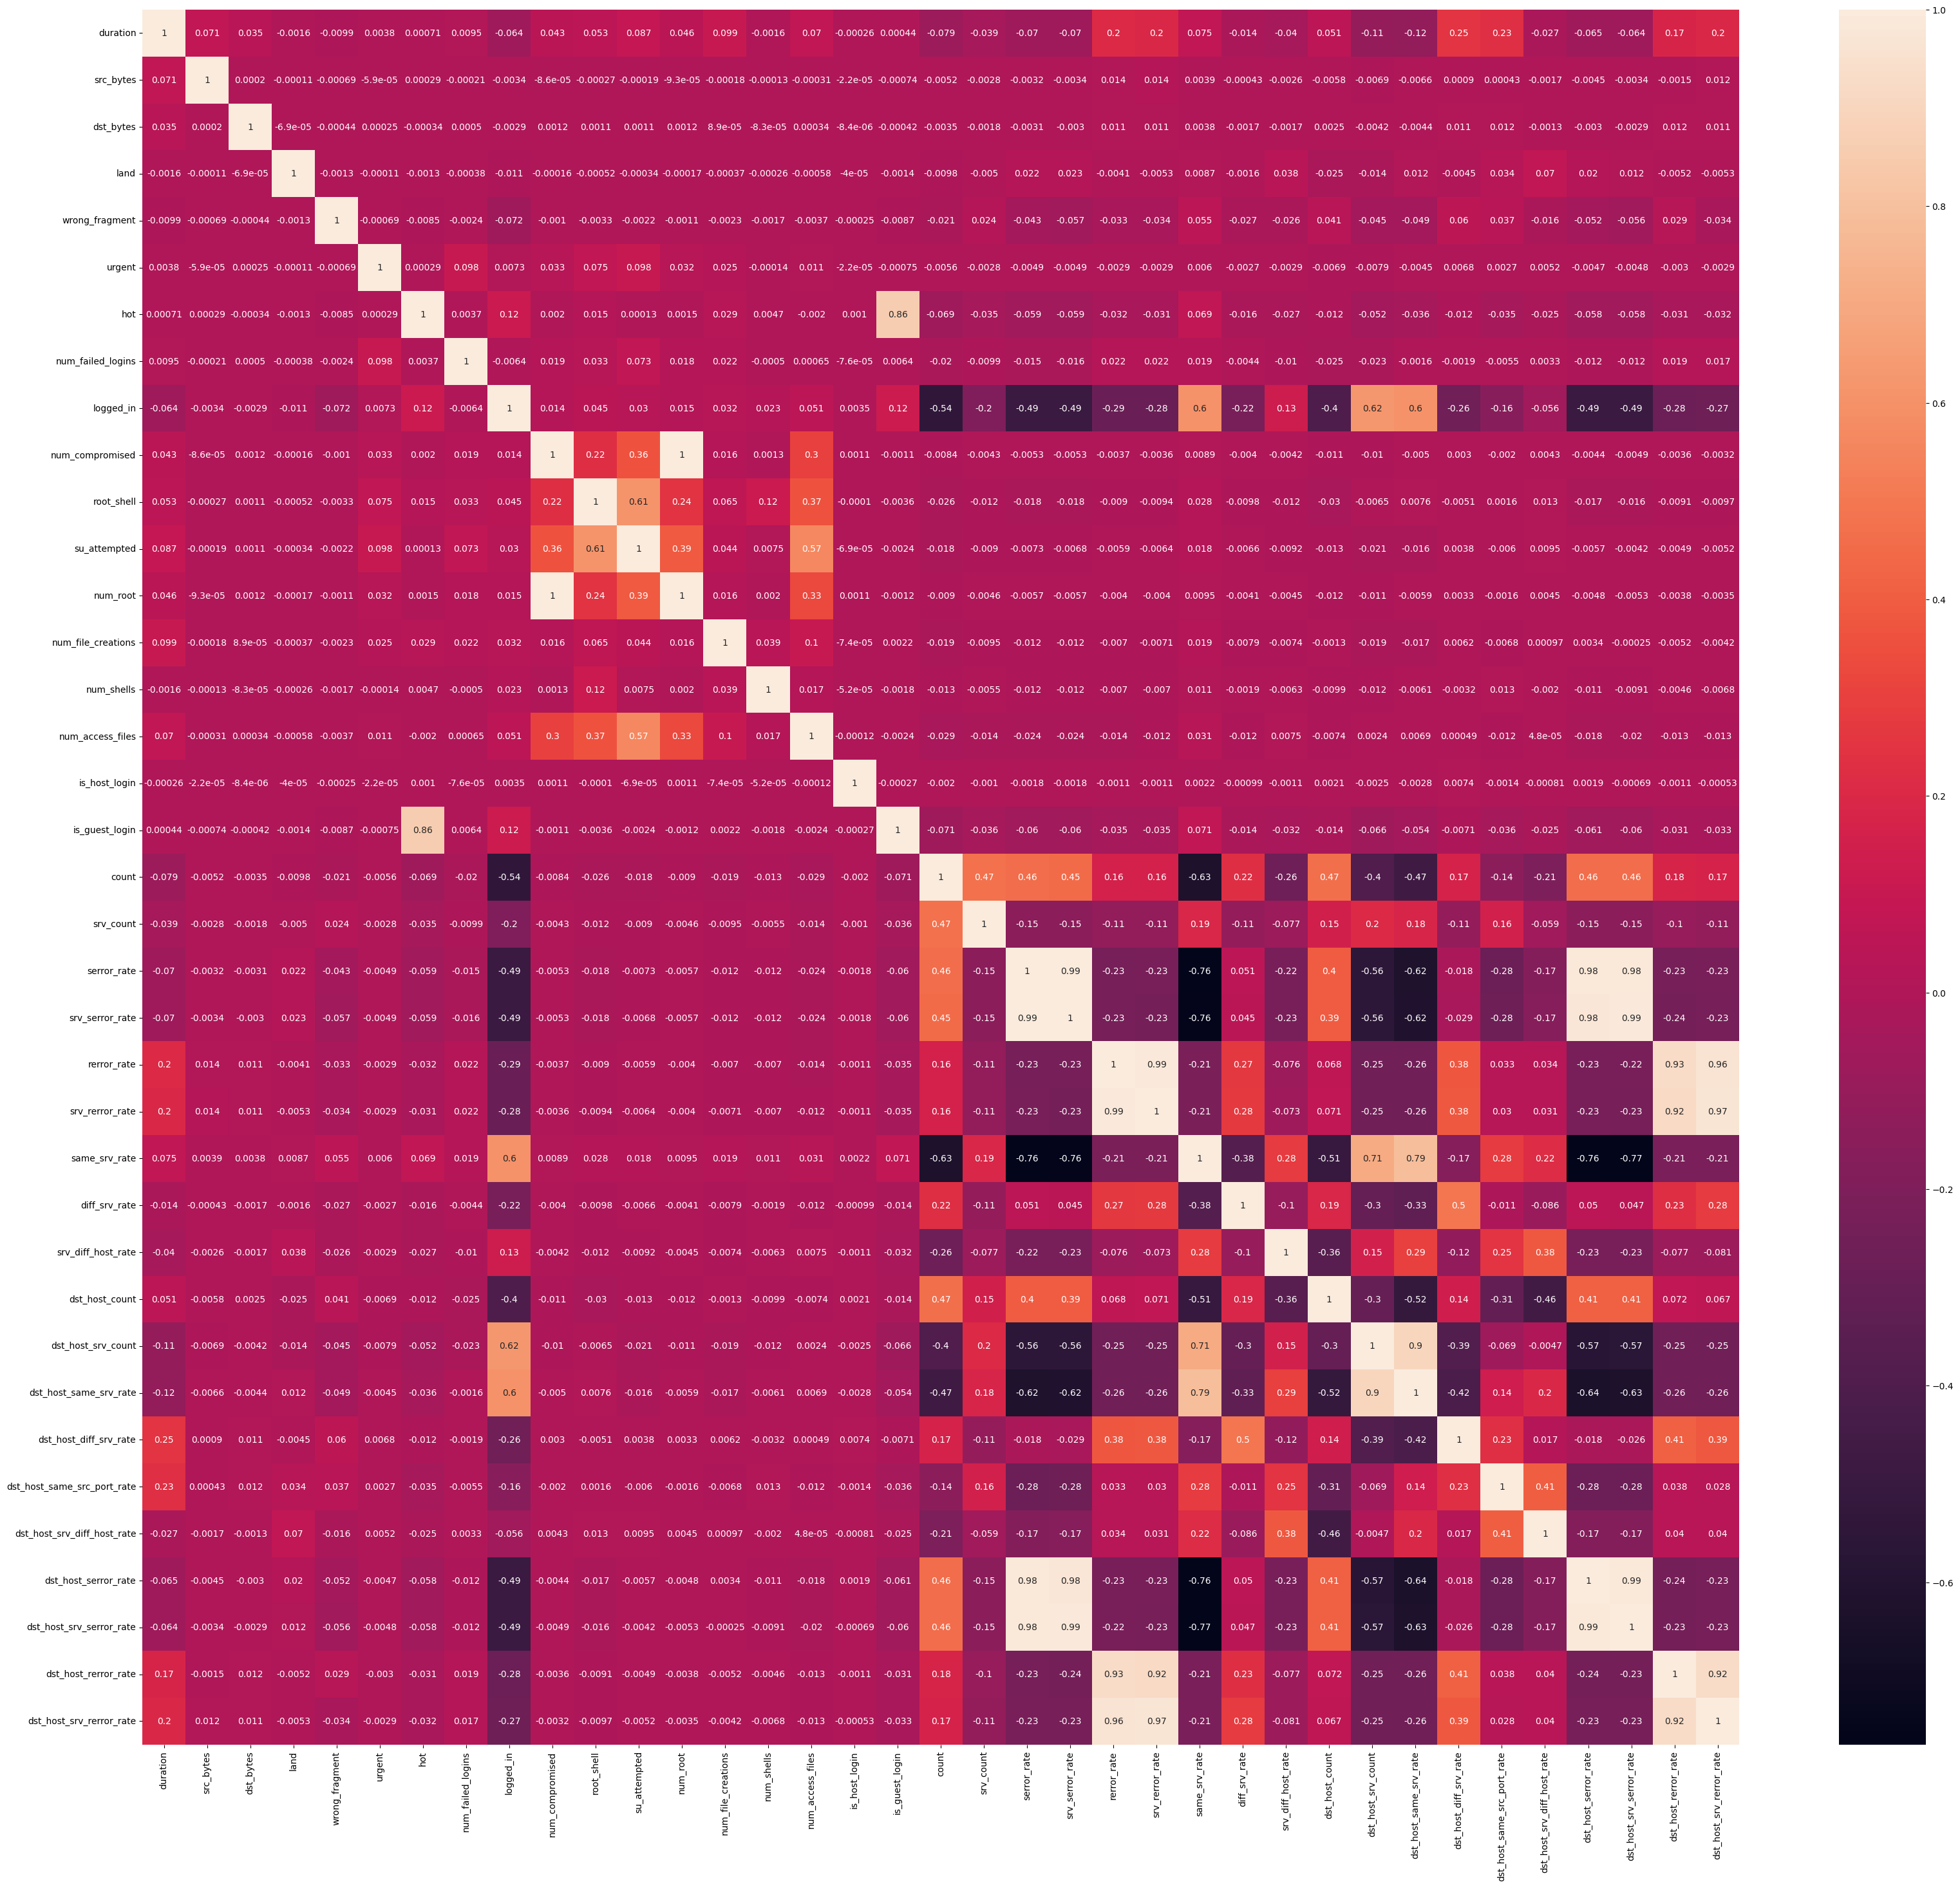

In [ ]:
plt.figure(figsize=(40,35))
sns.heatmap(Train_data.corr(), annot= True)

In [14]:
Train_data.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [15]:
def attack(row):
    if row['attack'] == 'normal':
        return 'normal'
    elif row['attack'] in ['port-Sweep', 'ip-Sweep', 'nmap', 'satan', 'saint', 'mscan']:
        return 'Probing'
    elif row['attack'] in ['neptune', 'smurf', 'pod', 'teardrop', 'land', 'back', 'apache2',
                           'udpstorm', 'processtable', ',mail-Bomb']:
        return 'Dos'
    elif row['attack'] in ['buffer-Overflow', 'load-Module', 'perl', 'rootkit', 'xterm',
                           'ps', 'sqlattack']:
        return 'U2R'
    else:
        return 'R2L'

In [16]:
Train_data['attack']=Train_data.apply(attack,axis=1)
Test_data['attack']=Test_data.apply(attack,axis=1)

<ipython-input-17-8c37c5c76856>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y, palette='YlGnBu')


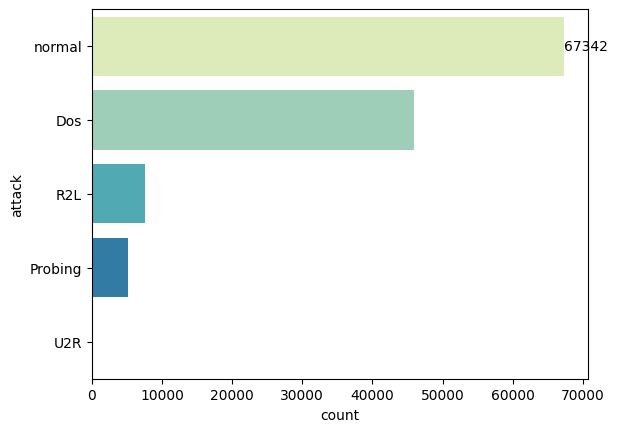

In [17]:
y=Train_data['attack']
ax = sns.countplot(y, palette='YlGnBu')
ax.bar_label(ax.containers[0]);

<ipython-input-18-820b9cbab297>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y, palette='YlGnBu')


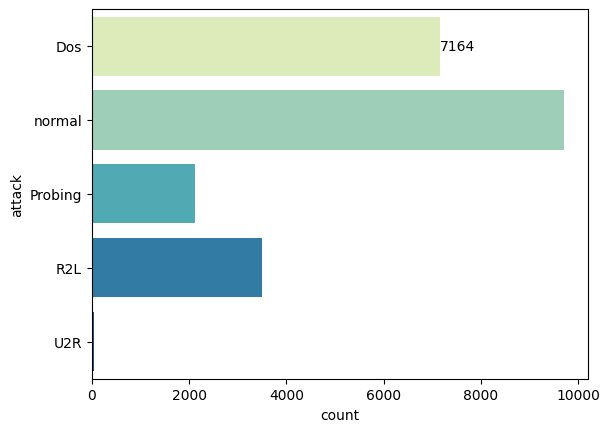

In [18]:
y=Test_data['attack']
ax = sns.countplot(y, palette='YlGnBu')
ax.bar_label(ax.containers[0]);

In [19]:
ob=Train_data.select_dtypes(['object']).columns
ob

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [ ]:
# Displaying the first five records after feature scaling
Train_data.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   1   
1               0       0    0  ...                  26   
2               0       0    0  ...                 255   
3               0       0    0  ...                 255   
4               0       0    0  ...                  19   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.00                    0.60   
1                    0.10                    0.05   
2                    1.00                    0.00   
3                    1.00                    0.00   
4                    0.07                    0.07   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.88                         0.00   
1                         0.00                         0.00   
2                         0.03                         0.04   
3                         0.00                         0.00   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                   0.0   
1                  1.00                      1.00                   0.0   
2                  0.03                      0.01                   0.0   
3                  0.00                      0.00                   0.0   
4                  0.00                      0.00                   1.0   

   dst_host_srv_rerror_rate  attack  
0                      0.00  normal  
1                      0.00     Dos  
2                      0.01  normal  
3                      0.00  normal  
4                      1.00     Dos  

[5 rows x 41 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
protocol_type_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()

In [ ]:
Train_data['protocol_type'] = protocol_type_le.fit_transform(Train_data['protocol_type'])
Train_data['service'] = service_le.fit_transform(Train_data['service'])
Train_data['flag'] = flag_le.fit_transform(Train_data['flag'])

In [ ]:
Test_data['protocol_type'] = protocol_type_le.transform(Test_data['protocol_type'])
Test_data['service'] = service_le.transform(Test_data['service'])
Test_data['flag'] = flag_le.transform(Test_data['flag'])

In [ ]:
Train_data

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              2       44     9        146          0     0   
1              0              1       49     5          0          0     0   
2              0              1       24     9        232       8153     0   
3              0              1       24     9        199        420     0   
4              0              1       49     1          0          0     0   
...          ...            ...      ...   ...        ...        ...   ...   
125967         0              1       49     5          0          0     0   
125968         8              2       49     9        105        145     0   
125969         0              1       54     9       2231        384     0   
125970         0              1       30     5          0          0     0   
125971         0              1       20     9        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                    0       0    0  ...                   1   
1                    0       0    0  ...                  26   
2                    0       0    0  ...                 255   
3                    0       0    0  ...                 255   
4                    0       0    0  ...                  19   
...                ...     ...  ...  ...                 ...   
125967               0       0    0  ...                  25   
125968               0       0    0  ...                 244   
125969               0       0    0  ...                  30   
125970               0       0    0  ...                   8   
125971               0       0    0  ...                  77   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                         0.00                    0.60   
1                         0.10                    0.05   
2                         1.00                    0.00   
3                         1.00                    0.00   
4                         0.07                    0.07   
...                        ...                     ...   
125967                    0.10                    0.06   
125968                    0.96                    0.01   
125969                    0.12                    0.06   
125970                    0.03                    0.05   
125971                    0.30                    0.03   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              0.88                         0.00   
1                              0.00                         0.00   
2                              0.03                         0.04   
3                              0.00                         0.00   
4                              0.00                         0.00   
...                             ...                          ...   
125967                         0.00                         0.00   
125968                         0.01                         0.00   
125969                         0.00                         0.00   
125970                         0.00                         0.00   
125971                         0.30                         0.00   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.00                      0.00                  0.00   
1                       1.00                      1.00                  0.00   
2                       0.03                      0.01                  0.00   
3                       0.00                      0.00                  0.00   
4                       0.00                      0.00                  1.00   
...                      ...                       ...                   ...   
125967                  1.00                      1.00                  0.00   
125968                  0.00                      0.00                  0.00   
125969                  0.72                      0.00              

In [ ]:
# Separating dataset into predictor(X) and target(y) variables
X = Train_data.copy()
X.drop(['attack'], axis=1, inplace=True)
y = Train_data['attack']

In [ ]:
# Hyperparametric testing


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.998571145068466


In [ ]:
# Finding the best features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_accuracy = 0
best_features = None

# Iterate over different numbers of features
for num_features in range(1, 41):
    # Train a RandomForestClassifier using num_features
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train.iloc[:, :num_features], y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test.iloc[:, :num_features])

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Check if the current set of features gives higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = X_train.columns[:num_features]

# Print the best features and accuracy
print("Best Features:", best_features)
print("Best Accuracy:", best_accuracy)

Best Features: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate'],
      dtype='object')
Best Accuracy: 0.9986902163127604


In [ ]:
# Scaling the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
scaler = preprocessing.StandardScaler().fit(X)

In [ ]:
X

duration  protocol_type   service      flag  src_bytes  dst_bytes  \
0      -0.110250       2.219302  0.781420  0.751116  -0.007737  -0.004919   
1      -0.110250      -0.124707  1.087297 -0.736227  -0.007762  -0.004919   
2      -0.110250      -0.124707 -0.442088  0.751116  -0.007723  -0.002891   
3      -0.110250      -0.124707 -0.442088  0.751116  -0.007728  -0.004814   
4      -0.110250      -0.124707  1.087297 -2.223571  -0.007762  -0.004919   
...          ...            ...       ...       ...        ...        ...   
125967 -0.110250      -0.124707  1.087297 -0.736227  -0.007762  -0.004919   
125968 -0.107178       2.219302  1.087297  0.751116  -0.007744  -0.004883   
125969 -0.110250      -0.124707  1.393174  0.751116  -0.007382  -0.004823   
125970 -0.110250      -0.124707 -0.075035 -0.736227  -0.007762  -0.004919   
125971 -0.110250      -0.124707 -0.686789  0.751116  -0.007737  -0.004919   

            land  wrong_fragment    urgent       hot  ...  dst_host_count  \
0      -0.014089       -0.089487 -0.007736 -0.095076  ...        0.734337   
1      -0.014089       -0.089487 -0.007736 -0.095076  ...        0.734337   
2      -0.014089       -0.089487 -0.007736 -0.095076  ...       -1.533667   
3      -0.014089       -0.089487 -0.007736 -0.095076  ...        0.734337   
4      -0.014089       -0.089487 -0.007736 -0.095076  ...        0.734337   
...          ...             ...       ...       ...  ...             ...   
125967 -0.014089       -0.089487 -0.007736 -0.095076  ...        0.734337   
125968 -0.014089       -0.089487 -0.007736 -0.095076  ...        0.734337   
125969 -0.014089       -0.089487 -0.007736 -0.095076  ...        0.734337   
125970 -0.014089       -0.089487 -0.007736 -0.095076  ...        0.734337   
125971 -0.014089       -0.089487 -0.007736 -0.095076  ...        0.734337   

        dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                -1.035693               -1.161035                2.736839   
1                -0.809862               -0.938292               -0.174419   
2                 1.258746                1.066393               -0.439079   
3                 1.258746                1.066393               -0.439079   
4                -0.873095               -1.005115               -0.068555   
...                    ...                     ...                     ...   
125967           -0.818895               -0.938292               -0.121487   
125968            1.159381                0.977296               -0.386147   
125969           -0.773729               -0.893743               -0.121487   
125970           -0.972460               -1.094212               -0.174419   
125971           -0.349168               -0.492806               -0.280283   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                          2.367729                    -0.289105   
1                         -0.480194                    -0.289105   
2                         -0.383106                     0.066249   
3                         -0.480194                    -0.289105   
4                         -0.480194                    -0.289105   
...                             ...                          ...   
125967                    -0.480194                    -0.289105   
125968                    -0.447832                    -0.289105   
125969                    -0.480194                    -0.289105   
125970                    -0.480194                    -0.289105   
125971                     0.490688                    -0.289105   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  -0.639535                 -0.624874             -0.387635   
1                   1.608750                  1.618946             -0.387635   
2                  -0.572087                 -0.602436             -0.387635   
3                  -0.639535                 -0.624874             -0.387635   
4   

Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif


k_best_features = 37
# Initializing SelectKBest with mutual_info_classif as scoring function
selector = SelectKBest(score_func=mutual_info_classif, k=k_best_features)

selector.fit(X, y)

# Getting the scores of all features
feature_scores = selector.scores_

# Getting the names and scores of all features
feature_names_scores = zip(columns, feature_scores)

# Sorting features based on their scores
sorted_features = sorted(feature_names_scores, key=lambda x: x[1], reverse=True)

print("Selected features and their scores:")
for feature, score in sorted_features[:k_best_features]:
    print(f"{feature}: {score}")

Selected features and their scores:
src_bytes: 0.7001625390206845
service: 0.5821649695184374
same_srv_rate: 0.5301295955680458
flag: 0.5075445963880165
srv_rerror_rate: 0.4835232604794264
dst_bytes: 0.45447620495246577
dst_host_same_srv_rate: 0.45401667286311786
is_guest_login: 0.43368525907222977
dst_host_count: 0.41824816254144626
dst_host_srv_diff_host_rate: 0.4179093886173568
dst_host_srv_count: 0.40949589192198377
srv_count: 0.4077518763152588
dst_host_serror_rate: 0.38241736282020433
serror_rate: 0.3664388061124486
logged_in: 0.2943769329629573
dst_host_same_src_port_rate: 0.2710952440144687
dst_host_diff_srv_rate: 0.24960051520984106
srv_diff_host_rate: 0.21220756732848445
count: 0.16390371335547194
diff_srv_rate: 0.14793459154731692
srv_serror_rate: 0.10403126152098885
dst_host_srv_serror_rate: 0.10326495947276237
protocol_type: 0.09118304308184899
dst_host_rerror_rate: 0.080213939685573
duration: 0.058113821299523805
rerror_rate: 0.054835515656212586
hot: 0.01621998650922052


In [ ]:
# Creating an instance of SelectKBest feature selector to select best 37 features
select = SelectKBest(score_func=mutual_info_classif, k=37)

In [ ]:
# Selecting the 37 best features based on the mutual information score
X = select.fit_transform(X,y)

In [ ]:
X

array([[-0.11024967,  2.21930219,  0.78142044, ..., -0.62487425,
        -0.38763494, -0.37638873],
       [-0.11024967, -0.12470666,  1.08729745, ...,  1.61894633,
        -0.38763494, -0.37638873],
       [-0.11024967, -0.12470666, -0.44208761, ..., -0.60243604,
        -0.38763494, -0.34508583],
       ...,
       [-0.11024967, -0.12470666,  1.39317446, ..., -0.62487425,
        -0.35501463, -0.37638873],
       [-0.11024967, -0.12470666, -0.0750352 , ...,  1.61894633,
        -0.38763494, -0.37638873],
       [-0.11024967, -0.12470666, -0.68678922, ..., -0.62487425,
        -0.38763494, -0.37638873]])

## INITIAL MODELING - BASE MODELS

In [ ]:
# Encoding target attribute values using LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
y

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
Train_data

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              2       44     9        146          0     0   
1              0              1       49     5          0          0     0   
2              0              1       24     9        232       8153     0   
3              0              1       24     9        199        420     0   
4              0              1       49     1          0          0     0   
...          ...            ...      ...   ...        ...        ...   ...   
125967         0              1       49     5          0          0     0   
125968         8              2       49     9        105        145     0   
125969         0              1       54     9       2231        384     0   
125970         0              1       30     5          0          0     0   
125971         0              1       20     9        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                    0       0    0  ...                   1   
1                    0       0    0  ...                  26   
2                    0       0    0  ...                 255   
3                    0       0    0  ...                 255   
4                    0       0    0  ...                  19   
...                ...     ...  ...  ...                 ...   
125967               0       0    0  ...                  25   
125968               0       0    0  ...                 244   
125969               0       0    0  ...                  30   
125970               0       0    0  ...                   8   
125971               0       0    0  ...                  77   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                         0.00                    0.60   
1                         0.10                    0.05   
2                         1.00                    0.00   
3                         1.00                    0.00   
4                         0.07                    0.07   
...                        ...                     ...   
125967                    0.10                    0.06   
125968                    0.96                    0.01   
125969                    0.12                    0.06   
125970                    0.03                    0.05   
125971                    0.30                    0.03   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              0.88                         0.00   
1                              0.00                         0.00   
2                              0.03                         0.04   
3                              0.00                         0.00   
4                              0.00                         0.00   
...                             ...                          ...   
125967                         0.00                         0.00   
125968                         0.01                         0.00   
125969                         0.00                         0.00   
125970                         0.00                         0.00   
125971                         0.30                         0.00   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.00                      0.00                  0.00   
1                       1.00                      1.00                  0.00   
2                       0.03                      0.01                  0.00   
3                       0.00                      0.00                  0.00   
4                       0.00                      0.00                  1.00   
...                      ...                       ...                   ...   
125967                  1.00                      1.00                  0.00   
125968                  0.00                      0.00                  0.00   
125969                  0.72                      0.00              

In [ ]:
# Splitting the dataset in a 80:20 train-test split ratio
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

PERCEPTRON

In [ ]:
# Creating an instance of the model
model = Perceptron()

In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

Perceptron()

In [ ]:
# Getting the model predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred, average='weighted')])

# harmonic mean of the precision and recall
# best value is 1 and the worst value is 0
table.add_row(["F1 Score", f1_score(y_test, y_pred, average='weighted')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9081     4     3     1   135] |
|                   |   [    0   668   170     0   209] |
|                   |   [   15    22  1288     0   210] |
|                   |   [    0     0     0     0     3] |
|                   |  [  115   157   402     1 12711]] |
|      Accuracy     |         0.9425679698352848        |
|     Precision     |         0.9446695498025162        |
|      F1 Score     |         0.9428589594202234        |
+-------------------+-----------------------------------+


LOGISTIC REGRESSION

In [ ]:
# Creating an instance of the model
model = LogisticRegression(max_iter=2000)

In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
# Getting the model predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred, average='weighted')])

# harmonic mean of the precision and recall
# best value is 1 and the worst value is 0
table.add_row(["F1 Score", f1_score(y_test, y_pred, average='weighted')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9156     4     1     0    63] |
|                   |   [    0   818    66     0   163] |
|                   |   [   22    23  1270     0   220] |
|                   |   [    0     0     0     0     3] |
|                   |  [   76   132   168     0 13010]] |
|      Accuracy     |         0.9626513197062909        |
|     Precision     |         0.9620034380148618        |
|      F1 Score     |         0.9622774312633545        |
+-------------------+-----------------------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Stochastic Gradient Descent Classifier

In [ ]:
# Creating an instance of the model
model = SGDClassifier()

In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

SGDClassifier()

In [ ]:
# Getting the model predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred, average='weighted')])

# harmonic mean of the precision and recall
# best value is 1 and the worst value is 0
table.add_row(["F1 Score", f1_score(y_test, y_pred, average='weighted')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9107     3     3     0   111] |
|                   |   [    0   779    61     0   207] |
|                   |   [   36    12  1295     0   192] |
|                   |   [    0     0     0     0     3] |
|                   |  [  111    79   176     0 13020]] |
|      Accuracy     |         0.9605477277237547        |
|     Precision     |         0.9599251253868546        |
|      F1 Score     |         0.9599409095987903        |
+-------------------+-----------------------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [ ]:
# Creating an instance of the model
model = GaussianNB()

In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
# Getting the model predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred, average='weighted')])

# harmonic mean of the precision and recall
# best value is 1 and the worst value is 0
table.add_row(["F1 Score", f1_score(y_test, y_pred, average='weighted')])


print(table)

+-------------------+------------------------------+
| Evaluation Metric |            Value             |
+-------------------+------------------------------+
|  Confusion Matrix | [[7429 1599   14    2  180]  |
|                   |  [   0  994    7   46    0]  |
|                   |  [   1 1088  320  121    5]  |
|                   |  [   0    0    2    1    0]  |
|                   |  [2588 7209  932 1061 1596]] |
|      Accuracy     |      0.4103988886683866      |
|     Precision     |      0.7666823004425709      |
|      F1 Score     |      0.4153049632169304      |
+-------------------+------------------------------+


DECISION TREE CLASSIFIER

In [ ]:
# Creating an instance of the model
model = DecisionTreeClassifier()

In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Getting the model predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred, average='weighted')])

# harmonic mean of the precision and recall
# best value is 1 and the worst value is 0
table.add_row(["F1 Score", f1_score(y_test, y_pred, average='weighted')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9222     0     0     0     2] |
|                   |   [    0  1036     4     0     7] |
|                   |   [    0     7  1510     1    17] |
|                   |   [    0     0     0     1     2] |
|                   |  [    6     3    11     2 13364]] |
|      Accuracy     |         0.9975391942845803        |
|     Precision     |         0.9975652798054344        |
|      F1 Score     |         0.9975508329186565        |
+-------------------+-----------------------------------+


Histogram-based Gradient Boosting Classification Tree

In [ ]:
# Creating an instance of the model
model = HistGradientBoostingClassifier()

In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [ ]:
# Getting the model predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred, average='weighted')])

# harmonic mean of the precision and recall
# best value is 1 and the worst value is 0
table.add_row(["F1 Score", f1_score(y_test, y_pred, average='weighted')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9171     0     1    48     4] |
|                   |   [    0  1029     2     7     9] |
|                   |   [    1     3  1411    91    29] |
|                   |   [    0     0     0     0     3] |
|                   |  [    6     4    10    22 13344]] |
|      Accuracy     |         0.9904743004564398        |
|     Precision     |         0.9969790566376919        |
|      F1 Score     |         0.9936413674707263        |
+-------------------+-----------------------------------+


EXTRA TREES CLASSIFIER

In [ ]:
# Creating an instance of the model
model = ExtraTreesClassifier()

In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [ ]:
# Getting the model predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred, average='weighted')])

# harmonic mean of the precision and recall
# best value is 1 and the worst value is 0
table.add_row(["F1 Score", f1_score(y_test, y_pred, average='weighted')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9223     0     0     0     1] |
|                   |   [    0  1040     4     0     3] |
|                   |   [    0     5  1513     0    17] |
|                   |   [    0     0     0     0     3] |
|                   |  [    1     2     7     0 13376]] |
|      Accuracy     |         0.9982933121651121        |
|     Precision     |         0.9981720848700697        |
|      F1 Score     |         0.998231774245809         |
+-------------------+-----------------------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RANDOM FOREST

In [ ]:
# Creating an instance of the model
model = RandomForestClassifier()

In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Getting the model predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred, average='weighted')])

# harmonic mean of the precision and recall
# best value is 1 and the worst value is 0
table.add_row(["F1 Score", f1_score(y_test, y_pred, average='weighted')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9223     0     0     0     1] |
|                   |   [    0  1036     3     0     8] |
|                   |   [    0     4  1517     0    14] |
|                   |   [    0     0     0     0     3] |
|                   |  [    1     0     2     0 13383]] |
|      Accuracy     |         0.998571145068466         |
|     Precision     |         0.9984510802489017        |
|      F1 Score     |         0.9985091639798217        |
+-------------------+-----------------------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multi-layer Perceptron

In [ ]:
# Creating an instance of the model
model = MLPClassifier(max_iter=1000)

In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

MLPClassifier(max_iter=1000)

In [ ]:
# Getting the model predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred, average='weighted')])

# harmonic mean of the precision and recall
# best value is 1 and the worst value is 0
table.add_row(["F1 Score", f1_score(y_test, y_pred, average='weighted')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9212     1     1     0    10] |
|                   |   [    0  1035     5     0     7] |
|                   |   [    2     4  1496     0    33] |
|                   |   [    0     0     0     0     3] |
|                   |  [    3     9    20     0 13354]] |
|      Accuracy     |         0.9961103393530463        |
|     Precision     |         0.995986657466796         |
|      F1 Score     |         0.9960470046287182        |
+-------------------+-----------------------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM

In [ ]:
# Creating an instance of the model
model = svm.SVC(max_iter=1000)

In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=1000)

In [ ]:
# Getting the model predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred, average='weighted')])

# harmonic mean of the precision and recall
# best value is 1 and the worst value is 0
table.add_row(["F1 Score", f1_score(y_test, y_pred, average='weighted')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9198     0     0     0    26] |
|                   |   [    0  1010     2     0    35] |
|                   |   [    6    11  1448     0    70] |
|                   |   [    0     0     0     0     3] |
|                   |  [   12    14    68     0 13292]] |
|      Accuracy     |         0.9901964675530859        |
|     Precision     |         0.9900500027423066        |
|      F1 Score     |         0.9901188626014343        |
+-------------------+-----------------------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN

In [ ]:
# Creating an instance of the model
model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Getting the model predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred, average='weighted')])

# harmonic mean of the precision and recall
# best value is 1 and the worst value is 0
table.add_row(["F1 Score", f1_score(y_test, y_pred, average='weighted')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9214     0     0     0    10] |
|                   |   [    0  1033     5     0     9] |
|                   |   [    3    11  1499     1    21] |
|                   |   [    0     0     0     0     3] |
|                   |  [    4    16    18     0 13348]] |
|      Accuracy     |         0.9959912681087517        |
|     Precision     |         0.9959177796462839        |
|      F1 Score     |         0.9959518639942793        |
+-------------------+-----------------------------------+


XGBOOST

In [ ]:
from xgboost import XGBClassifier
# Creating an instance of the model
model = XGBClassifier()

In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Getting the model predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred, average='weighted')])

# harmonic mean of the precision and recall
# best value is 1 and the worst value is 0
table.add_row(["F1 Score", f1_score(y_test, y_pred, average='weighted')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9224     0     0     0     0] |
|                   |   [    0  1038     4     0     5] |
|                   |   [    0     4  1524     0     7] |
|                   |   [    0     0     0     0     3] |
|                   |  [    2     1     3     0 13380]] |
|      Accuracy     |         0.9988489779718198        |
|     Precision     |         0.9987288369830991        |
|      F1 Score     |         0.9987885889347077        |
+-------------------+-----------------------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.9 MB/s eta 0:00:00


CATBOOST

In [ ]:
from catboost import CatBoostClassifier
# Creating an instance of the model
model = CatBoostClassifier()

In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

Learning rate set to 0.073853
0:	learn: 0.5123558	total: 76.8ms	remaining: 1m 16s
1:	learn: 0.3983221	total: 105ms	remaining: 52.3s
2:	learn: 0.3004304	total: 132ms	remaining: 43.8s
3:	learn: 0.2384413	total: 160ms	remaining: 39.7s
4:	learn: 0.2013073	total: 190ms	remaining: 37.8s
5:	learn: 0.1571002	total: 218ms	remaining: 36s
6:	learn: 0.1284219	total: 245ms	remaining: 34.8s
7:	learn: 0.1116168	total: 275ms	remaining: 34.1s
8:	learn: 0.0955569	total: 303ms	remaining: 33.4s
9:	learn: 0.0836362	total: 330ms	remaining: 32.7s
10:	learn: 0.0733685	total: 358ms	remaining: 32.2s
11:	learn: 0.0658980	total: 385ms	remaining: 31.7s
12:	learn: 0.0601409	total: 415ms	remaining: 31.5s
13:	learn: 0.0569305	total: 446ms	remaining: 31.4s
14:	learn: 0.0534112	total: 472ms	remaining: 31s
15:	learn: 0.0511240	total: 501ms	remaining: 30.8s
16:	learn: 0.0488420	total: 528ms	remaining: 30.5s
17:	learn: 0.0462171	total: 552ms	remaining: 30.1s
18:	learn: 0.0444216	total: 578ms	remaining: 29.8s
19:	learn: 0.

In [ ]:
# Getting the model predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred, average='weighted')])

# harmonic mean of the precision and recall
# best value is 1 and the worst value is 0
table.add_row(["F1 Score", f1_score(y_test, y_pred, average='weighted')])


print(table)

+-------------------+--------------------+
| Evaluation Metric |       Value        |
+-------------------+--------------------+
|  Confusion Matrix |   [[11779    30]   |
|                   |   [   11 13375]]   |
|      Accuracy     | 0.9983726929946418 |
|     Precision     | 0.9983736771010132 |
|      F1 Score     | 0.9983726149445429 |
+-------------------+--------------------+


## IMPLEMENTING STACKING CLASSIFIERS

### Combination 1: All Base Classifiers + Meta Classifier Random Forest Classifier

In [ ]:
# Creating the list of base classifiers
estimators = [ ('Logistic Regression', LogisticRegression(max_iter=2000)),
               ('Stochastic Gradient Descent Classifier', SGDClassifier()),
               ('Perceptron', Perceptron()),
               ('Random Forest', RandomForestClassifier()),
               ('Gaussian Naive Bayes Classifier', GaussianNB()),
               ('Decision Tree', DecisionTreeClassifier()),
               ('Catboost', CatBoostClassifier()),
               ('Histogram-based Gradient Boosting Classification Tree', HistGradientBoostingClassifier()),
               ('Extra Trees Classifier', ExtraTreesClassifier()),
               ('Multi-layer Perceptron', MLPClassifier(max_iter=1000)),
	             ('Support Vector Machine', svm.SVC(max_iter=1000)),
	             ('K Nearest Neighbours', KNeighborsClassifier(n_neighbors=3)),
             ]

In [ ]:
# Creating an instance of the model
model = StackingClassifier(estimators = estimators, final_estimator = XGBClassifier())


In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

Learning rate set to 0.100114
0:	learn: 1.2763951	total: 109ms	remaining: 1m 48s
1:	learn: 1.0665043	total: 221ms	remaining: 1m 50s
2:	learn: 0.9112604	total: 311ms	remaining: 1m 43s
3:	learn: 0.7924431	total: 402ms	remaining: 1m 40s
4:	learn: 0.6962682	total: 502ms	remaining: 1m 39s
5:	learn: 0.6163101	total: 598ms	remaining: 1m 39s
6:	learn: 0.5524576	total: 693ms	remaining: 1m 38s
7:	learn: 0.4967419	total: 785ms	remaining: 1m 37s
8:	learn: 0.4502433	total: 882ms	remaining: 1m 37s
9:	learn: 0.4086787	total: 968ms	remaining: 1m 35s
10:	learn: 0.3730997	total: 1.06s	remaining: 1m 35s
11:	learn: 0.3411526	total: 1.17s	remaining: 1m 36s
12:	learn: 0.3133676	total: 1.26s	remaining: 1m 35s
13:	learn: 0.2883443	total: 1.36s	remaining: 1m 35s
14:	learn: 0.2644500	total: 1.45s	remaining: 1m 35s
15:	learn: 0.2455756	total: 1.54s	remaining: 1m 34s
16:	learn: 0.2280143	total: 1.65s	remaining: 1m 35s
17:	learn: 0.2122114	total: 1.73s	remaining: 1m 34s
18:	learn: 0.1980044	total: 1.82s	remaining:

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
4:	learn: 0.7015451	total: 410ms	remaining: 1m 21s
5:	learn: 0.6234407	total: 491ms	remaining: 1m 21s
6:	learn: 0.5584764	total: 589ms	remaining: 1m 23s
7:	learn: 0.5005338	total: 665ms	remaining: 1m 22s
8:	learn: 0.4516921	total: 740ms	remaining: 1m 21s
9:	learn: 0.4106449	total: 816ms	remaining: 1m 20s
10:	learn: 0.3739934	total: 892ms	remaining: 1m 20s
11:	learn: 0.3414547	total: 976ms	remaining: 1m 20s
12:	learn: 0.3130205	total: 1.05s	remaining: 1m 20s
13:	learn: 0.2884970	total: 1.13s	remaining: 1m 19s
14:	learn: 0.2659496	total: 1.21s	remaining: 1m 19s
15:	learn: 0.2454182	total: 1.29s	remaining: 1m 19s
16:	learn: 0.2269137	total: 1.37s	remaining: 1m 19s
17:	learn: 0.2092054	total: 1.46s	remaining: 1m 19s
18:	learn: 0.1943391	total: 1.53s	remaining: 1m 19s
19:	learn: 0.1806078	total: 1.62s	remaining: 1m 19s
20:	learn: 0.1697128	total: 1.69s	remaining: 1m 18s
21:	learn: 0.1591627	total: 1.76s	remaining: 1m 18s
22:	learn: 0.148991

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

StackingClassifier(estimators=[('Logistic Regression',
                                LogisticRegression(max_iter=2000)),
                               ('Stochastic Gradient Descent Classifier',
                                SGDClassifier()),
                               ('Perceptron', Perceptron()),
                               ('Random Forest', RandomForestClassifier()),
                               ('Gaussian Naive Bayes Classifier',
                                GaussianNB()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('Catboost',
                                <catboost.core.CatBoostClassifier obj...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [ ]:
# Getting the model predictions
y_pred0 = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred, average='weighted')])

# harmonic mean of the precision and recall
# best value is 1 and the worst value is 0
table.add_row(["F1 Score", f1_score(y_test, y_pred, average='weighted')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9224     0     0     0     0] |
|                   |   [    0  1038     4     0     5] |
|                   |   [    0     4  1524     0     7] |
|                   |   [    0     0     0     0     3] |
|                   |  [    2     1     3     0 13380]] |
|      Accuracy     |         0.9988489779718198        |
|     Precision     |         0.9987288369830991        |
|      F1 Score     |         0.9987885889347077        |
+-------------------+-----------------------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Combination 2: Seven Best Base Classifiers + Meta Classifier Random Forest Classifier

In [ ]:
# Creating the list of base classifiers
estimators17 = [('Random Forest', RandomForestClassifier()),
               ('Decision Tree', DecisionTreeClassifier()),
               ('Catboost', CatBoostClassifier()),
               ('Histogram-based Gradient Boosting Classification Tree', HistGradientBoostingClassifier()),
               ('Extra Trees Classifier', ExtraTreesClassifier()),
               ('Multi-layer Perceptron', MLPClassifier(max_iter=1000)),
	             ('K Nearest Neighbours', KNeighborsClassifier(n_neighbors=3)),
             ]

In [ ]:
# Creating an instance of the model
model = StackingClassifier(estimators = estimators17, final_estimator = XGBClassifier())

In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.7015451	total: 411ms	remaining: 1m 21s
5:	learn: 0.6234407	total: 491ms	remaining: 1m 21s
6:	learn: 0.5584764	total: 581ms	remaining: 1m 22s
7:	learn: 0.5005338	total: 656ms	remaining: 1m 21s
8:	learn: 0.4516921	total: 736ms	remaining: 1m 21s
9:	learn: 0.4106449	total: 812ms	remaining: 1m 20s
10:	learn: 0.3739934	total: 886ms	remaining: 1m 19s
11:	learn: 0.3414547	total: 973ms	remaining: 1m 20s
12:	learn: 0.3130205	total: 1.05s	remaining: 1m 20s
13:	learn: 0.2884970	total: 1.14s	remaining: 1m 20s
14:	learn: 0.2659496	total: 1.22s	remaining: 1m 20s
15:	learn: 0.2454182	total: 1.3s	remaining: 1m 20s
16:	learn: 0.2269137	total: 1.39s	remaining: 1m 20s
17:	learn: 0.2092054	total: 1.49s	remaining: 1m 21s
18:	learn: 0.1943391	total: 1.56s	remaining: 1m 20s
19:	learn: 0.1806078	total: 1.64s	remaining: 1m 20s
20:	learn: 0.1697128	total: 1.71s	remaining: 1m 19s
21:	learn: 0.1591627	total: 1.78s	remaining: 1m 19s
22:	learn: 0.1489914

StackingClassifier(estimators=[('Random Forest', RandomForestClassifier()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('Catboost',
                                <catboost.core.CatBoostClassifier object at 0x7c47ceeb1c00>),
                               ('Histogram-based Gradient Boosting '
                                'Classification Tree',
                                HistGradientBoostingClassifier()),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier()),
                               ('Multi-layer Perceptron',
                                MLP...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [ ]:
# Getting the model predictions
y_pred1 = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred, average='weighted')])

# harmonic mean of the precision and recall
# best value is 1 and the worst value is 0
table.add_row(["F1 Score", f1_score(y_test, y_pred, average='weighted')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9224     0     0     0     0] |
|                   |   [    0  1038     4     0     5] |
|                   |   [    0     4  1524     0     7] |
|                   |   [    0     0     0     0     3] |
|                   |  [    2     1     3     0 13380]] |
|      Accuracy     |         0.9988489779718198        |
|     Precision     |         0.9987288369830991        |
|      F1 Score     |         0.9987885889347077        |
+-------------------+-----------------------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Combination 3: Five Best Base Classifiers + Meta Classifier Random Forest Classifier

In [ ]:
# Creating the list of base classifiers
estimators15 = [ ('Random Forest', RandomForestClassifier()),
               ('Decision Tree', DecisionTreeClassifier()),
               ('Catboost', CatBoostClassifier()),
               ('Extra Trees Classifier', ExtraTreesClassifier()),
               ('Multi-layer Perceptron', MLPClassifier(max_iter=1000)),
             ]

In [ ]:
# Creating an instance of the model
model = StackingClassifier(estimators = estimators15, final_estimator = XGBClassifier())


In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.7015451	total: 430ms	remaining: 1m 25s
5:	learn: 0.6234407	total: 520ms	remaining: 1m 26s
6:	learn: 0.5584764	total: 610ms	remaining: 1m 26s
7:	learn: 0.5005338	total: 684ms	remaining: 1m 24s
8:	learn: 0.4516921	total: 760ms	remaining: 1m 23s
9:	learn: 0.4106449	total: 838ms	remaining: 1m 22s
10:	learn: 0.3739934	total: 916ms	remaining: 1m 22s
11:	learn: 0.3414547	total: 1s	remaining: 1m 22s
12:	learn: 0.3130205	total: 1.08s	remaining: 1m 22s
13:	learn: 0.2884970	total: 1.17s	remaining: 1m 22s
14:	learn: 0.2659496	total: 1.26s	remaining: 1m 22s
15:	learn: 0.2454182	total: 1.34s	remaining: 1m 22s
16:	learn: 0.2269137	total: 1.42s	remaining: 1m 22s
17:	learn: 0.2092054	total: 1.51s	remaining: 1m 22s
18:	learn: 0.1943391	total: 1.59s	remaining: 1m 22s
19:	learn: 0.1806078	total: 1.67s	remaining: 1m 21s
20:	learn: 0.1697128	total: 1.75s	remaining: 1m 21s
21:	learn: 0.1591627	total: 1.82s	remaining: 1m 21s
22:	learn: 0.1489914	t

StackingClassifier(estimators=[('Random Forest', RandomForestClassifier()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('Catboost',
                                <catboost.core.CatBoostClassifier object at 0x7c47cee770d0>),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier()),
                               ('Multi-layer Perceptron',
                                MLPClassifier(max_iter=1000))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 ca...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [ ]:
# Getting the model predictions
y_pred2 = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred2)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred2)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred2, average='micro')])

# ability of the classifier to find all the positive samples
# best value is 1 and the worst value is 0
table.add_row(["Recall", recall_score(y_test, y_pred2, average='micro')])

print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9223     0     0     0     1] |
|                   |   [    0  1037     6     0     4] |
|                   |   [    0     3  1523     0     9] |
|                   |   [    0     0     0     0     3] |
|                   |  [    2     4     1     0 13379]] |
|      Accuracy     |         0.9986902163127604        |
|     Precision     |         0.9986902163127604        |
|       Recall      |         0.9986902163127604        |
+-------------------+-----------------------------------+


### Combination 4: Three Best Base Classifiers + Meta Classifier Random Forest Classifier

In [ ]:
# Creating the list of base classifiers
estimators13 = [('Random Forest', RandomForestClassifier()),
               ('Catboost', CatBoostClassifier()),
               ('Extra Trees Classifier', ExtraTreesClassifier())
             ]

In [ ]:
# Creating an instance of the model
model = StackingClassifier(estimators = estimators13, final_estimator = XGBClassifier())

In [ ]:
# Fitting the model on the training set
model.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.2018748	total: 120ms	remaining: 23.9s
5:	learn: 0.1700847	total: 146ms	remaining: 24.3s
6:	learn: 0.1452492	total: 173ms	remaining: 24.6s
7:	learn: 0.1211488	total: 207ms	remaining: 25.7s
8:	learn: 0.1083876	total: 239ms	remaining: 26.3s
9:	learn: 0.0969362	total: 269ms	remaining: 26.6s
10:	learn: 0.0877651	total: 296ms	remaining: 26.6s
11:	learn: 0.0796069	total: 324ms	remaining: 26.7s
12:	learn: 0.0739078	total: 350ms	remaining: 26.6s
13:	learn: 0.0671449	total: 373ms	remaining: 26.2s
14:	learn: 0.0616670	total: 399ms	remaining: 26.2s
15:	learn: 0.0576710	total: 426ms	remaining: 26.2s
16:	learn: 0.0545833	total: 451ms	remaining: 26.1s
17:	learn: 0.0502421	total: 475ms	remaining: 25.9s
18:	learn: 0.0471066	total: 503ms	remaining: 26s
19:	learn: 0.0447699	total: 526ms	remaining: 25.8s
20:	learn: 0.0428420	total: 551ms	remaining: 25.7s
21:	learn: 0.0402611	total: 573ms	remaining: 25.5s
22:	learn: 0.0377897	total: 597ms	remai

StackingClassifier(estimators=[('Random Forest', RandomForestClassifier()),
                               ('Catboost',
                                <catboost.core.CatBoostClassifier object at 0x7f980d6b1cc0>),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [ ]:
# Getting the model predictions
y_pred3 = model.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred3)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred3)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred3, average='micro')])

# ability of the classifier to find all the positive samples
# best value is 1 and the worst value is 0
table.add_row(["Recall", recall_score(y_test, y_pred3, average='micro')])

print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9223     0     0     0     1] |
|                   |   [    0  1042     3     0     2] |
|                   |   [    0     3  1521     0    11] |
|                   |   [    0     0     0     0     3] |
|                   |  [    2     4     5     1 13374]] |
|      Accuracy     |         0.9986108354832308        |
|     Precision     |         0.9986108354832308        |
|       Recall      |         0.9986108354832308        |
+-------------------+-----------------------------------+


### Combination 5: All Base Classifiers + Meta Classifier Extra Trees Classifier

In [ ]:
# Creating the list of base classifiers
estimators2 = [ ('Logistic Regression', LogisticRegression(max_iter=2000)),
               ('Stochastic Gradient Descent Classifier', SGDClassifier()),
               ('Perceptron', Perceptron()),
               ('CatBoost', CatBoostClassifier()),
               ('Gaussian Naive Bayes Classifier', GaussianNB()),
               ('Decision Tree', DecisionTreeClassifier()),
               ('XGBoost', XGBClassifier()),
               ('Histogram-based Gradient Boosting Classification Tree', HistGradientBoostingClassifier()),
               ('Extra Trees Classifier', ExtraTreesClassifier()),
               ('Multi-layer Perceptron', MLPClassifier(max_iter=1000)),
	             ('Support Vector Machine', svm.SVC(max_iter=1000)),
	             ('K Nearest Neighbours', KNeighborsClassifier(n_neighbors=3))
             ]

In [ ]:
# Creating an instance of the model
model4 = StackingClassifier(estimators = estimators2, final_estimator = RandomForestClassifier() )

In [ ]:
# Fitting the model on the training set
model4.fit(X_train,y_train)

Learning rate set to 0.073853
0:	learn: 0.5123558	total: 30.8ms	remaining: 30.8s
1:	learn: 0.3983221	total: 60.7ms	remaining: 30.3s
2:	learn: 0.3004304	total: 90.3ms	remaining: 30s
3:	learn: 0.2384413	total: 118ms	remaining: 29.4s
4:	learn: 0.2013073	total: 146ms	remaining: 29.1s
5:	learn: 0.1571002	total: 173ms	remaining: 28.6s
6:	learn: 0.1284219	total: 203ms	remaining: 28.8s
7:	learn: 0.1116168	total: 233ms	remaining: 28.9s
8:	learn: 0.0955569	total: 261ms	remaining: 28.7s
9:	learn: 0.0836362	total: 289ms	remaining: 28.6s
10:	learn: 0.0733685	total: 318ms	remaining: 28.6s
11:	learn: 0.0658980	total: 360ms	remaining: 29.6s
12:	learn: 0.0601409	total: 388ms	remaining: 29.5s
13:	learn: 0.0569305	total: 421ms	remaining: 29.6s
14:	learn: 0.0534112	total: 454ms	remaining: 29.8s
15:	learn: 0.0511240	total: 479ms	remaining: 29.5s
16:	learn: 0.0488420	total: 509ms	remaining: 29.4s
17:	learn: 0.0462171	total: 534ms	remaining: 29.2s
18:	learn: 0.0444216	total: 563ms	remaining: 29.1s
19:	learn:

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
4:	learn: 0.2018748	total: 119ms	remaining: 23.8s
5:	learn: 0.1700847	total: 142ms	remaining: 23.5s
6:	learn: 0.1452492	total: 165ms	remaining: 23.4s
7:	learn: 0.1211488	total: 188ms	remaining: 23.3s
8:	learn: 0.1083876	total: 216ms	remaining: 23.7s
9:	learn: 0.0969362	total: 240ms	remaining: 23.8s
10:	learn: 0.0877651	total: 263ms	remaining: 23.6s
11:	learn: 0.0796069	total: 286ms	remaining: 23.5s
12:	learn: 0.0739078	total: 308ms	remaining: 23.4s
13:	learn: 0.0671449	total: 329ms	remaining: 23.2s
14:	learn: 0.0616670	total: 369ms	remaining: 24.2s
15:	learn: 0.0576710	total: 390ms	remaining: 24s
16:	learn: 0.0545833	total: 415ms	remaining: 24s
17:	learn: 0.0502421	total: 439ms	remaining: 23.9s
18:	learn: 0.0471066	total: 461ms	remaining: 23.8s
19:	learn: 0.0447699	total: 484ms	remaining: 23.7s
20:	learn: 0.0428420	total: 508ms	remaining: 23.7s
21:	learn: 0.0402611	total: 529ms	remaining: 23.5s
22:	learn: 0.0377897	total: 551ms	remaini

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

StackingClassifier(estimators=[('Logistic Regression',
                                LogisticRegression(max_iter=2000)),
                               ('Stochastic Gradient Descent Classifier',
                                SGDClassifier()),
                               ('Perceptron', Perceptron()),
                               ('CatBoost',
                                <catboost.core.CatBoostClassifier object at 0x7f98098a6920>),
                               ('Gaussian Naive Bayes Classifier',
                                GaussianNB()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('XGBoost',
                                XGBClassi...
                                              random_state=None, ...)),
                               ('Histogram-based Gradient Boosting '
                                'Classification Tree',
                                HistGradientBoostingClassifier()),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier()),
                               ('Multi-layer Perceptron',
                                MLPClassifier(max_iter=1000)),
                               ('Support Vector Machine', SVC(max_iter=1000)),
                               ('K Nearest Neighbours',
                                KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=RandomForestClassifier())

In [ ]:
# Getting the model predictions
y_pred4 = model4.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred4)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred4)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred4, average='micro')])

# ability of the classifier to find all the positive samples
# best value is 1 and the worst value is 0
table.add_row(["Recall", recall_score(y_test, y_pred4, average='micro')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9224     0     0     0     0] |
|                   |   [    0  1039     4     0     4] |
|                   |   [    0     3  1526     0     6] |
|                   |   [    0     0     0     0     3] |
|                   |  [    3     2     3     0 13378]] |
|      Accuracy     |         0.9988886683865846        |
|     Precision     |         0.9988886683865846        |
|       Recall      |         0.9988886683865846        |
+-------------------+-----------------------------------+


### Combination 6: Seven Best Base Classifiers + Meta Classifier Extra Trees Classifier

In [ ]:
# Creating the list of base classifiers
estimators27 = [ ('CatBoost', CatBoostClassifier()),
               ('Decision Tree', DecisionTreeClassifier()),
               ('XGBoost', XGBClassifier()),
               ('Histogram-based Gradient Boosting Classification Tree', HistGradientBoostingClassifier()),
               ('Extra Trees Classifier', ExtraTreesClassifier()),
               ('Multi-layer Perceptron', MLPClassifier(max_iter=1000)),
	             ('K Nearest Neighbours', KNeighborsClassifier(n_neighbors=3))
             ]

In [ ]:
# Creating an instance of the model
model5 = StackingClassifier(estimators = estimators27, final_estimator = RandomForestClassifier())

In [ ]:
# Fitting the model on the training set
model5.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6995423	total: 412ms	remaining: 1m 22s
5:	learn: 0.6214221	total: 496ms	remaining: 1m 22s
6:	learn: 0.5586651	total: 579ms	remaining: 1m 22s
7:	learn: 0.5049241	total: 652ms	remaining: 1m 20s
8:	learn: 0.4563397	total: 731ms	remaining: 1m 20s
9:	learn: 0.4137330	total: 806ms	remaining: 1m 19s
10:	learn: 0.3774540	total: 889ms	remaining: 1m 19s
11:	learn: 0.3457592	total: 988ms	remaining: 1m 21s
12:	learn: 0.3168962	total: 1.06s	remaining: 1m 20s
13:	learn: 0.2921475	total: 1.14s	remaining: 1m 20s
14:	learn: 0.2701494	total: 1.22s	remaining: 1m 20s
15:	learn: 0.2498058	total: 1.3s	remaining: 1m 20s
16:	learn: 0.2307585	total: 1.38s	remaining: 1m 19s
17:	learn: 0.2141932	total: 1.47s	remaining: 1m 20s
18:	learn: 0.1999789	total: 1.54s	remaining: 1m 19s
19:	learn: 0.1851486	total: 1.61s	remaining: 1m 19s
20:	learn: 0.1730357	total: 1.69s	remaining: 1m 18s
21:	learn: 0.1615541	total: 1.78s	remaining: 1m 18s
22:	learn: 0.1512069

StackingClassifier(estimators=[('CatBoost',
                                <catboost.core.CatBoostClassifier object at 0x7cd2eceaf220>),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_me...
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('Histogram-based Gradient Boosting '
                                'Classification Tree',
                                HistGradientBoostingClassifier()),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier()),
                               ('Multi-layer Perceptron',
                                MLPClassifier(max_iter=1000)),
                               ('K Nearest Neighbours',
                                KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=RandomForestClassifier())

In [ ]:
# Getting the model predictions
y_pred5 = model5.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred5)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred5)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred5, average='micro')])

# ability of the classifier to find all the positive samples
# best value is 1 and the worst value is 0
table.add_row(["Recall", recall_score(y_test, y_pred5, average='micro')])

print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9224     0     0     0     0] |
|                   |   [    0  1039     4     0     4] |
|                   |   [    0     1  1528     0     6] |
|                   |   [    0     0     0     0     3] |
|                   |  [    2     3     2     0 13379]] |
|      Accuracy     |         0.9990077396308792        |
|     Precision     |         0.9990077396308792        |
|       Recall      |         0.9990077396308792        |
+-------------------+-----------------------------------+


### Combination 7: Five Best Base Classifiers + Meta Classifier Extra Trees Classifier

In [ ]:
# Creating the list of base classifiers
estimators25 = [
               ('CatBoost', CatBoostClassifier()),
               ('Decision Tree', DecisionTreeClassifier()),
               ('XGBoost', XGBClassifier()),
               ('Extra Trees Classifier', ExtraTreesClassifier()),
               ('Multi-layer Perceptron', MLPClassifier(max_iter=1000)),
             ]

In [ ]:
# Creating an instance of the model
model6 = StackingClassifier(estimators = estimators25, final_estimator = RandomForestClassifier())

In [ ]:
# Fitting the model on the training set
model6.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6995423	total: 417ms	remaining: 1m 23s
5:	learn: 0.6214221	total: 506ms	remaining: 1m 23s
6:	learn: 0.5586651	total: 591ms	remaining: 1m 23s
7:	learn: 0.5049241	total: 683ms	remaining: 1m 24s
8:	learn: 0.4563397	total: 760ms	remaining: 1m 23s
9:	learn: 0.4137330	total: 839ms	remaining: 1m 23s
10:	learn: 0.3774540	total: 911ms	remaining: 1m 21s
11:	learn: 0.3457592	total: 995ms	remaining: 1m 21s
12:	learn: 0.3168962	total: 1.07s	remaining: 1m 21s
13:	learn: 0.2921475	total: 1.15s	remaining: 1m 20s
14:	learn: 0.2701494	total: 1.23s	remaining: 1m 20s
15:	learn: 0.2498058	total: 1.31s	remaining: 1m 20s
16:	learn: 0.2307585	total: 1.39s	remaining: 1m 20s
17:	learn: 0.2141932	total: 1.47s	remaining: 1m 20s
18:	learn: 0.1999789	total: 1.54s	remaining: 1m 19s
19:	learn: 0.1851486	total: 1.62s	remaining: 1m 19s
20:	learn: 0.1730357	total: 1.71s	remaining: 1m 19s
21:	learn: 0.1615541	total: 1.81s	remaining: 1m 20s
22:	learn: 0.151206

StackingClassifier(estimators=[('CatBoost',
                                <catboost.core.CatBoostClassifier object at 0x7cd2ecee92a0>),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_me...
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier()),
                               ('Multi-layer Perceptron',
                                MLPClassifier(max_iter=1000))],
                   final_estimator=RandomForestClassifier())

In [ ]:
# Getting the model predictions
y_pred6 = model6.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred6)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred6)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred6, average='micro')])

# ability of the classifier to find all the positive samples
# best value is 1 and the worst value is 0
table.add_row(["Recall", recall_score(y_test, y_pred6, average='micro')])

print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9224     0     0     0     0] |
|                   |   [    0  1039     4     0     4] |
|                   |   [    0     2  1527     0     6] |
|                   |   [    0     0     0     0     3] |
|                   |  [    2     0     3     0 13381]] |
|      Accuracy     |         0.999047430045644         |
|     Precision     |         0.999047430045644         |
|       Recall      |         0.999047430045644         |
+-------------------+-----------------------------------+


### Combination 8: Three Best Base Classifiers + Meta Classifier Extra Trees Classifier

In [ ]:
# Creating the list of base classifiers
estimators23 = [
               ('CatBoost', CatBoostClassifier()),
               ('XGBoost', XGBClassifier()),
               ('Extra Trees Classifier', ExtraTreesClassifier()),
	             ]


In [ ]:
# Creating an instance of the model
model7 = StackingClassifier(estimators = estimators23, final_estimator = RandomForestClassifier())

In [ ]:
# Fitting the model on the training set
model7.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6995423	total: 426ms	remaining: 1m 24s
5:	learn: 0.6214221	total: 546ms	remaining: 1m 30s
6:	learn: 0.5586651	total: 683ms	remaining: 1m 36s
7:	learn: 0.5049241	total: 835ms	remaining: 1m 43s
8:	learn: 0.4563397	total: 984ms	remaining: 1m 48s
9:	learn: 0.4137330	total: 1.12s	remaining: 1m 51s
10:	learn: 0.3774540	total: 1.26s	remaining: 1m 53s
11:	learn: 0.3457592	total: 1.42s	remaining: 1m 57s
12:	learn: 0.3168962	total: 1.56s	remaining: 1m 58s
13:	learn: 0.2921475	total: 1.68s	remaining: 1m 58s
14:	learn: 0.2701494	total: 1.82s	remaining: 1m 59s
15:	learn: 0.2498058	total: 1.98s	remaining: 2m 1s
16:	learn: 0.2307585	total: 2.13s	remaining: 2m 3s
17:	learn: 0.2141932	total: 2.3s	remaining: 2m 5s
18:	learn: 0.1999789	total: 2.44s	remaining: 2m 6s
19:	learn: 0.1851486	total: 2.59s	remaining: 2m 7s
20:	learn: 0.1730357	total: 2.75s	remaining: 2m 8s
21:	learn: 0.1615541	total: 2.92s	remaining: 2m 9s
22:	learn: 0.1512069	total:

StackingClassifier(estimators=[('CatBoost',
                                <catboost.core.CatBoostClassifier object at 0x7cd2ecf51180>),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gr...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier())],
                   final_estimator=RandomForestClassifier())

In [ ]:
# Getting the model predictions
y_pred7 = model7.predict(X_test)

In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred7)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred7)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred7, average='micro')])

# ability of the classifier to find all the positive samples
# best value is 1 and the worst value is 0
table.add_row(["Recall", recall_score(y_test, y_pred7, average='micro')])

print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9224     0     0     0     0] |
|                   |   [    0  1039     4     0     4] |
|                   |   [    0     1  1528     0     6] |
|                   |   [    0     0     0     0     3] |
|                   |  [    2     3     3     0 13378]] |
|      Accuracy     |         0.9989680492161143        |
|     Precision     |         0.9989680492161143        |
|       Recall      |         0.9989680492161143        |
+-------------------+-----------------------------------+


Combination 9: All Base Classifier + Meta Classifier CatBoost

In [ ]:
# Creating the list of base classifiers
estimators3 = [ ('Logistic Regression', LogisticRegression(max_iter=2000)),
               ('Stochastic Gradient Descent Classifier', SGDClassifier()),
               ('Perceptron', Perceptron()),
               ('Random Forest Classifier', RandomForestClassifier()),
               ('Gaussian Naive Bayes Classifier', GaussianNB()),
               ('Decision Tree', DecisionTreeClassifier()),
               ('XGBoost', XGBClassifier()),
               ('Histogram-based Gradient Boosting Classification Tree', HistGradientBoostingClassifier()),
               ('Extra Trees Classifier', ExtraTreesClassifier()),
               ('Multi-layer Perceptron', MLPClassifier(max_iter=1000)),
	             ('Support Vector Machine', svm.SVC(max_iter=1000)),
	             ('K Nearest Neighbours', KNeighborsClassifier(n_neighbors=3))
             ]

In [ ]:
# Creating an instance of the model
model9 = StackingClassifier(estimators = estimators3, final_estimator = CatBoostClassifier())

In [ ]:
# Fitting the model on the training set
model9.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with

Learning rate set to 0.100114
0:	learn: 1.2335381	total: 192ms	remaining: 3m 11s
1:	learn: 1.0054841	total: 368ms	remaining: 3m 3s
2:	learn: 0.8424201	total: 548ms	remaining: 3m 2s
3:	learn: 0.7180051	total: 711ms	remaining: 2m 56s
4:	learn: 0.6191473	total: 893ms	remaining: 2m 57s
5:	learn: 0.5385639	total: 1.06s	remaining: 2m 55s
6:	learn: 0.4716495	total: 1.3s	remaining: 3m 4s
7:	learn: 0.4151228	total: 1.57s	remaining: 3m 14s
8:	learn: 0.3670387	total: 1.89s	remaining: 3m 27s
9:	learn: 0.3255365	total: 2.19s	remaining: 3m 37s
10:	learn: 0.2896671	total: 2.45s	remaining: 3m 40s
11:	learn: 0.2584685	total: 2.77s	remaining: 3m 48s
12:	learn: 0.2309901	total: 3.09s	remaining: 3m 54s
13:	learn: 0.2067920	total: 3.42s	remaining: 4m
14:	learn: 0.1854709	total: 3.71s	remaining: 4m 3s
15:	learn: 0.1665633	total: 3.98s	remaining: 4m 4s
16:	learn: 0.1498768	total: 4.25s	remaining: 4m 6s
17:	learn: 0.1349537	total: 4.58s	remaining: 4m 9s
18:	learn: 0.1216865	total: 4.72s	remaining: 4m 3s
19:	l

StackingClassifier(estimators=[('Logistic Regression',
                                LogisticRegression(max_iter=2000)),
                               ('Stochastic Gradient Descent Classifier',
                                SGDClassifier()),
                               ('Perceptron', Perceptron()),
                               ('Random Forest Classifier',
                                RandomForestClassifier()),
                               ('Gaussian Naive Bayes Classifier',
                                GaussianNB()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('XGBoost',
                                XGBClassifier(base_score=No...
                               ('Histogram-based Gradient Boosting '
                                'Classification Tree',
                                HistGradientBoostingClassifier()),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier()),
                               ('Multi-layer Perceptron',
                                MLPClassifier(max_iter=1000)),
                               ('Support Vector Machine', SVC(max_iter=1000)),
                               ('K Nearest Neighbours',
                                KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x7cd2ecf53fa0>)

In [ ]:
# Getting the model predictions
y_pred9 = model9.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred9)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred9)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred9, average='micro')])

# ability of the classifier to find all the positive samples
# best value is 1 and the worst value is 0
table.add_row(["Recall", recall_score(y_test, y_pred9, average='micro')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9224     0     0     0     0] |
|                   |   [    0  1043     1     0     3] |
|                   |   [    0     5  1525     0     5] |
|                   |   [    0     0     0     0     3] |
|                   |  [    2     1     2     0 13381]] |
|      Accuracy     |         0.9991268108751736        |
|     Precision     |         0.9991268108751736        |
|       Recall      |         0.9991268108751736        |
+-------------------+-----------------------------------+


Combination 10: Seven Best Base Classifier + Meta Classifier CatBoost

In [ ]:
# Creating the list of base classifiers
estimators31 = [
               ('Random Forest Classifier', RandomForestClassifier()),
               ('Decision Tree', DecisionTreeClassifier()),
               ('XGBoost', XGBClassifier()),
               ('Histogram-based Gradient Boosting Classification Tree', HistGradientBoostingClassifier()),
               ('Extra Trees Classifier', ExtraTreesClassifier()),
               ('Multi-layer Perceptron', MLPClassifier(max_iter=1000)),
	             ('K Nearest Neighbours', KNeighborsClassifier(n_neighbors=3))
             ]

In [ ]:
# Creating an instance of the model
model10 = StackingClassifier(estimators = estimators31, final_estimator = CatBoostClassifier())

In [ ]:
# Fitting the model on the training set
model10.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Learning rate set to 0.100114
0:	learn: 1.2339146	total: 110ms	remaining: 1m 49s
1:	learn: 1.0053695	total: 217ms	remaining: 1m 48s
2:	learn: 0.8422578	total: 310ms	remaining: 1m 43s
3:	learn: 0.7183035	total: 412ms	remaining: 1m 42s
4:	learn: 0.6194387	total: 532ms	remaining: 1m 45s
5:	learn: 0.5388232	total: 652ms	remaining: 1m 47s
6:	learn: 0.4717755	total: 749ms	remaining: 1m 46s
7:	learn: 0.4152775	total: 855ms	remaining: 1m 46s
8:	learn: 0.3671270	total: 945ms	remaining: 1m 44s
9:	learn: 0.3255110	total: 1.05s	remaining: 1m 44s
10:	learn: 0.2894541	total: 1.16s	remaining: 1m 44s
11:	learn: 0.2580625	total: 1.27s	remaining: 1m 44s
12:	learn: 0.2305263	total: 1.38s	remaining: 1m 44s
13:	learn: 0.2063616	total: 1.49s	remaining: 1m 44s
14:	learn: 0.1850927	total: 1.61s	remaining: 1m 45s
15:	learn: 0.1662454	total: 1.72s	remaining: 1m 45s
16:	learn: 0.1494726	total: 1.82s	remaining: 1m 45s
17:	learn: 0.1345849	total: 1.91s	remaining: 1m 44s
18:	learn: 0.1213579	total: 2.02s	remaining:

StackingClassifier(estimators=[('Random Forest Classifier',
                                RandomForestClassifier()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_...
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('Histogram-based Gradient Boosting '
                                'Classification Tree',
                                HistGradientBoostingClassifier()),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier()),
                               ('Multi-layer Perceptron',
                                MLPClassifier(max_iter=1000)),
                               ('K Nearest Neighbours',
                                KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x7cd2eccd35b0>)

In [ ]:
# Getting the model predictions
y_pred10 = model10.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred10)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred10)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred10, average='micro')])

# ability of the classifier to find all the positive samples
# best value is 1 and the worst value is 0
table.add_row(["Recall", recall_score(y_test, y_pred10, average='micro')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9223     0     0     0     1] |
|                   |   [    0  1040     2     0     5] |
|                   |   [    1     2  1525     0     7] |
|                   |   [    0     0     0     0     3] |
|                   |  [    2     3     3     0 13378]] |
|      Accuracy     |         0.9988489779718198        |
|     Precision     |         0.9988489779718198        |
|       Recall      |         0.9988489779718198        |
+-------------------+-----------------------------------+


Combination 11: Five Best Base Classifier + Meta Classifier CatBoost

In [ ]:
# Creating the list of base classifiers
estimators32 = [
               ('Random Forest Classifier', RandomForestClassifier()),
               ('Decision Tree', DecisionTreeClassifier()),
               ('XGBoost', XGBClassifier()),
               ('Extra Trees Classifier', ExtraTreesClassifier()),
               ('Multi-layer Perceptron', MLPClassifier(max_iter=1000))
             ]

In [ ]:
# Creating an instance of the model
model11 = StackingClassifier(estimators = estimators32, final_estimator = CatBoostClassifier())

In [ ]:
# Fitting the model on the training set
model11.fit(X_train,y_train)

Learning rate set to 0.100114
0:	learn: 1.2335871	total: 123ms	remaining: 2m 2s
1:	learn: 1.0047468	total: 200ms	remaining: 1m 39s
2:	learn: 0.8421571	total: 268ms	remaining: 1m 28s
3:	learn: 0.7175267	total: 328ms	remaining: 1m 21s
4:	learn: 0.6185935	total: 394ms	remaining: 1m 18s
5:	learn: 0.5379498	total: 462ms	remaining: 1m 16s
6:	learn: 0.4709025	total: 536ms	remaining: 1m 16s
7:	learn: 0.4143541	total: 608ms	remaining: 1m 15s
8:	learn: 0.3662013	total: 678ms	remaining: 1m 14s
9:	learn: 0.3248273	total: 738ms	remaining: 1m 13s
10:	learn: 0.2889283	total: 806ms	remaining: 1m 12s
11:	learn: 0.2575892	total: 875ms	remaining: 1m 12s
12:	learn: 0.2301421	total: 936ms	remaining: 1m 11s
13:	learn: 0.2060009	total: 1s	remaining: 1m 10s
14:	learn: 0.1847701	total: 1.07s	remaining: 1m 10s
15:	learn: 0.1659373	total: 1.13s	remaining: 1m 9s
16:	learn: 0.1492918	total: 1.21s	remaining: 1m 9s
17:	learn: 0.1344338	total: 1.27s	remaining: 1m 9s
18:	learn: 0.1212287	total: 1.33s	remaining: 1m 8s


StackingClassifier(estimators=[('Random Forest Classifier',
                                RandomForestClassifier()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_...
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier()),
                               ('Multi-layer Perceptron',
                                MLPClassifier(max_iter=1000))],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x7c73bd2fde40>)

In [ ]:
# Getting the model predictions
y_pred11 = model11.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred11)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred11)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred11, average='micro')])

# ability of the classifier to find all the positive samples
# best value is 1 and the worst value is 0
table.add_row(["Recall", recall_score(y_test, y_pred11, average='micro')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9224     0     0     0     0] |
|                   |   [    0  1039     3     0     5] |
|                   |   [    0     3  1527     1     4] |
|                   |   [    0     0     0     0     3] |
|                   |  [    1     2     2     0 13381]] |
|      Accuracy     |         0.999047430045644         |
|     Precision     |         0.999047430045644         |
|       Recall      |         0.999047430045644         |
+-------------------+-----------------------------------+


Combination 12: Three Best Base Classifier + Meta Classifier CatBoost

In [ ]:
# Creating the list of base classifiers
estimators33 = [
               ('Random Forest Classifier', RandomForestClassifier()),
               ('XGBoost', XGBClassifier()),
               ('Extra Trees Classifier', ExtraTreesClassifier()),
             ]

In [ ]:
# Creating an instance of the model
model12 = StackingClassifier(estimators = estimators33, final_estimator = CatBoostClassifier())

In [ ]:
# Fitting the model on the training set
model12.fit(X_train,y_train)

Learning rate set to 0.100114
0:	learn: 1.2338751	total: 58.7ms	remaining: 58.6s
1:	learn: 1.0043009	total: 110ms	remaining: 54.9s
2:	learn: 0.8410299	total: 162ms	remaining: 53.9s
3:	learn: 0.7168462	total: 223ms	remaining: 55.5s
4:	learn: 0.6180302	total: 282ms	remaining: 56.1s
5:	learn: 0.5375329	total: 340ms	remaining: 56.3s
6:	learn: 0.4705869	total: 398ms	remaining: 56.5s
7:	learn: 0.4140922	total: 455ms	remaining: 56.5s
8:	learn: 0.3658496	total: 504ms	remaining: 55.5s
9:	learn: 0.3243572	total: 552ms	remaining: 54.7s
10:	learn: 0.2883874	total: 605ms	remaining: 54.4s
11:	learn: 0.2571065	total: 654ms	remaining: 53.9s
12:	learn: 0.2296840	total: 705ms	remaining: 53.5s
13:	learn: 0.2056472	total: 758ms	remaining: 53.4s
14:	learn: 0.1843749	total: 806ms	remaining: 52.9s
15:	learn: 0.1656217	total: 863ms	remaining: 53.1s
16:	learn: 0.1489369	total: 928ms	remaining: 53.6s
17:	learn: 0.1340689	total: 976ms	remaining: 53.2s
18:	learn: 0.1208944	total: 1.03s	remaining: 53s
19:	learn: 0

StackingClassifier(estimators=[('Random Forest Classifier',
                                RandomForestClassifier()),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              imp...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier())],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x7c73c4006110>)

In [ ]:
# Getting the model predictions
y_pred12 = model12.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Evaluating Model
table = PrettyTable()
table.field_names = ["Evaluation Metric", "Value"]

table.add_row(["Confusion Matrix", confusion_matrix(y_test,y_pred12)])

# fraction of correctly predicted instances
# 1 indicates perfect prediction accuracy and 0 indicates complete failure
table.add_row(["Accuracy", accuracy_score(y_test,y_pred12)])

# ability of the classifier not to label as positive a sample that is negative
# best value is 1 and the worst value is 0
table.add_row(["Precision", precision_score(y_test, y_pred12, average='micro')])

# ability of the classifier to find all the positive samples
# best value is 1 and the worst value is 0
table.add_row(["Recall", recall_score(y_test, y_pred12, average='micro')])


print(table)

+-------------------+-----------------------------------+
| Evaluation Metric |               Value               |
+-------------------+-----------------------------------+
|  Confusion Matrix |  [[ 9224     0     0     0     0] |
|                   |   [    0  1038     4     0     5] |
|                   |   [    0     3  1527     1     4] |
|                   |   [    0     0     0     0     3] |
|                   |  [    1     4     3     0 13378]] |
|      Accuracy     |         0.9988886683865846        |
|     Precision     |         0.9988886683865846        |
|       Recall      |         0.9988886683865846        |
+-------------------+-----------------------------------+
